# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning and Preprocessing

In [2]:
data = pd.read_csv('Daily Household Transactions.csv')
data.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,15/09/2018 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
6,14/09/2018 05:39:17,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR
8,13/09/2018 21:01:47,Credit Card,Other,NaN,HBR 2 Months subscription,83.0,Expense,INR
9,13/09/2018 21:01:32,Cash,Food,Grocery,1kg atta,46.0,Expense,INR


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [4]:
data.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [5]:
data.describe(include='object').T

,count,unique,top,freq
Date,2461,1611,2015-01-01,11
Mode,2461,12,Saving Bank account 1,1223
Category,2461,50,Food,907
Subcategory,1826,90,Milk,162
Note,1940,1057,milk 1lit,67
Income/Expense,2461,3,Expense,2176
Currency,2461,1,INR,2461


In [6]:
data.tail(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2451,2015-01-01,Cash,Transportation,NaN,share jeep - Place T top to base,20.0,Expense,INR
2452,2015-01-01,Cash,Transportation,NaN,share jeep - Place T to brc,60.0,Expense,INR
2453,2015-01-01,Cash,Culture,NaN,monument,40.0,Expense,INR
2454,2015-01-01,Cash,Food,NaN,Temple Prasad,200.0,Expense,INR
2455,2015-01-01,Cash,Transportation,NaN,ropeway Place T to and fro,142.0,Expense,INR
2456,2015-01-01,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,2015-01-01,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,2015-01-01,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,2015-01-01,Cash,Food,NaN,tea,10.0,Expense,INR
2460,2015-01-01,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [7]:
data.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [8]:
print(f"The dataset contains {data.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 9 duplicate rows that need to be removed.


In [9]:
data.shape[0]

2461

In [10]:
data.head(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [11]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Remove any rows with NaN values in essential columns
data = data.dropna(subset=['Date', 'Mode', 'Category', 'Amount', 'Income/Expense'])

# Filter for expense transactions only
data_expense = data[data['Income/Expense'] == 'Expense']

# Create a customer identifier (if not present, use 'Note' as a proxy for simplicity)
data_expense['CustomerID'] = data_expense['Note']

# Group by CustomerID to get customer-level metrics
customer_data = data_expense.groupby('CustomerID').agg({
    'Amount': ['sum', 'count', 'mean'],
}).reset_index()

customer_data.columns = ['CustomerID', 'Total_Spend', 'Num_Transactions', 'Avg_Transaction_Value']

# Preview the customer-level data
customer_data.head()


,CustomerID,Total_Spend,Num_Transactions,Avg_Transaction_Value
0,mutual fund,1000.0,1,1000.0
1,pedhe,150.0,2,75.0
2,( pav bhaji + 2 extra pav + sabudana khichdi +...,495.0,1,495.0
3,1 Panipuri,100.0,4,25.0
4,1 Place 0 to Place 6,5.0,1,5.0


# Step 2: Exploratory Data Analysis (EDA)

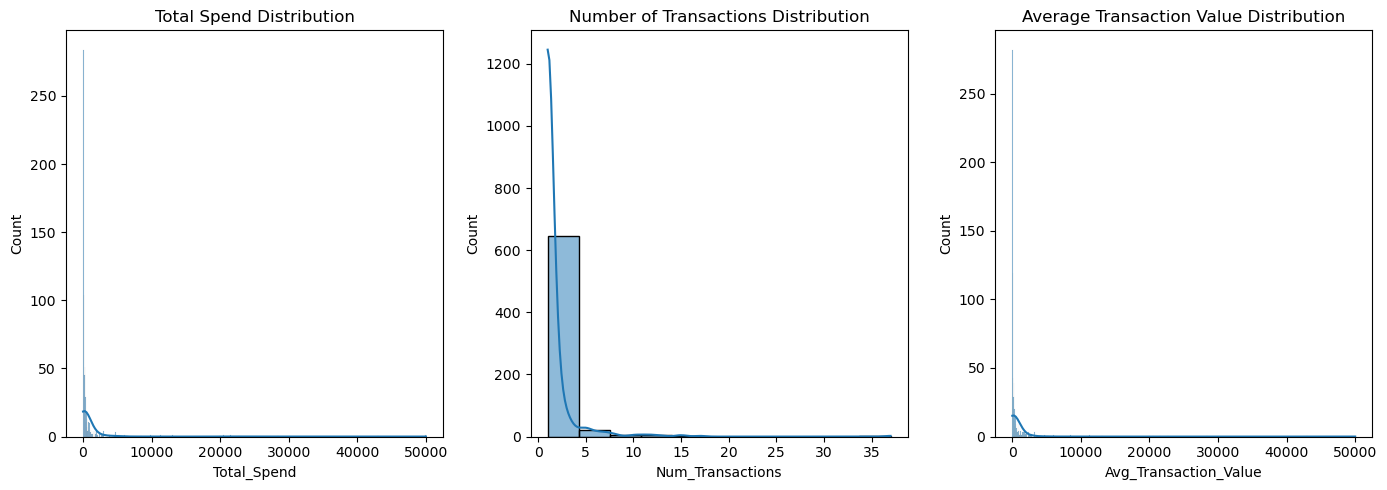

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = customer_data.describe()

# Histograms
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(customer_data['Total_Spend'], kde=True)
plt.title('Total Spend Distribution')

plt.subplot(1, 3, 2)
sns.histplot(customer_data['Num_Transactions'], kde=True)
plt.title('Number of Transactions Distribution')

plt.subplot(1, 3, 3)
sns.histplot(customer_data['Avg_Transaction_Value'], kde=True)
plt.title('Average Transaction Value Distribution')

plt.tight_layout()
plt.show()


# Step 3: Clustering Algorithms (K-means)

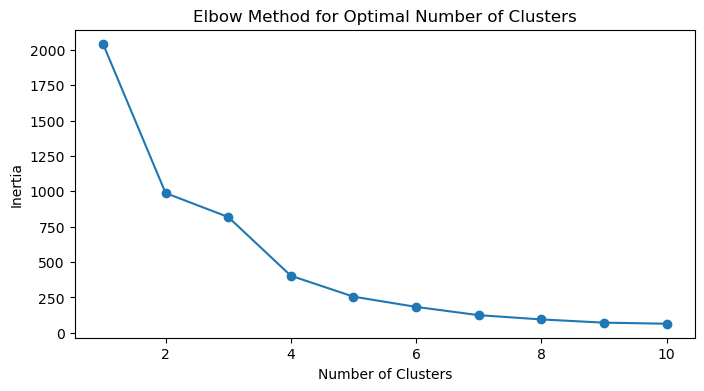

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Total_Spend', 'Num_Transactions', 'Avg_Transaction_Value']])

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)


# Step 4: Visualization of Customer Segments

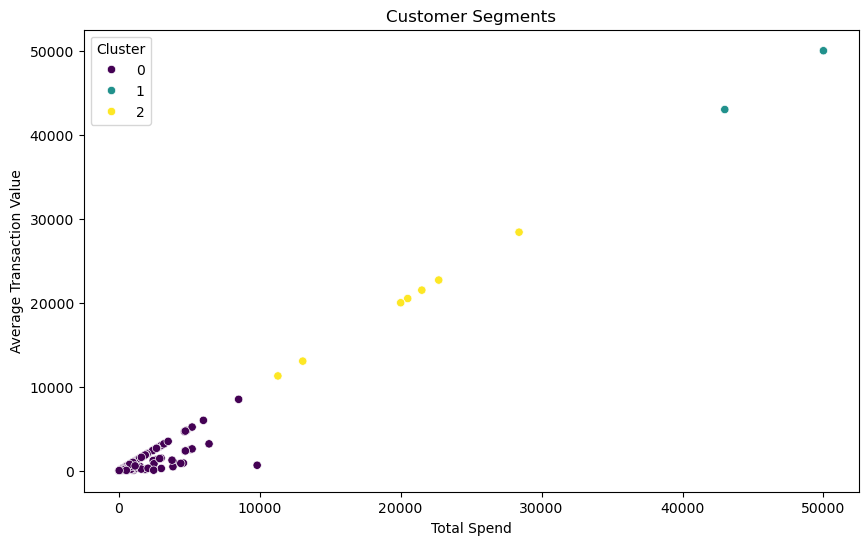

,Cluster,Avg_Total_Spend,Total_Spend,Avg_Num_Transactions,Avg_Transaction_Value,Num_Customers
0,0,463.834449,311696.75,1.592262,349.057638,672
1,1,46500.000000,93000.00,1.000000,46500.000000,2
2,2,19633.714286,137436.00,1.000000,19633.714286,7


In [15]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Spend', y='Avg_Transaction_Value', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Spend')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.show()

# Summarize the characteristics of each cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total_Spend': ['mean', 'sum'],
    'Num_Transactions': 'mean',
    'Avg_Transaction_Value': 'mean',
    'CustomerID': 'count'
}).reset_index()

cluster_summary.columns = ['Cluster', 'Avg_Total_Spend', 'Total_Spend', 'Avg_Num_Transactions', 'Avg_Transaction_Value', 'Num_Customers']
cluster_summary
